～日本の都道府県別平均寿命分析～

各都道府県の平均寿命と関連する要因を分析をしてみる。CSVファイル（Japan_life_expectancy.csv）には、各都道府県の平均寿命と様々な社会経済指標が含まれている。

参考
*   [kaggle](https://www.kaggle.com/)
*   [e-stat](https://www.e-stat.go.jp/en/stat-search/files?page=1&layout=datalist&toukei=00200502&tstat=000001201620&cycle=0&year=20230&month=0&tclass1=000001201621&tclass2val=0)



ダウンロードしたCSVファイルには、健康や教育、労働市場に関する各種の統計データが含まれています。以下は、ヘッダーとデータの内容に関する説明です。

### データ内容
- **Prefecture**: 都道府県名
- **Life_expectancy**: 平均寿命
- **Physician**: 医師数
- **Junior_col**: 中学校の数
- **University**: 大学の数
- **Public_Hosp**: 公立病院の数
- **Pshic_hosp**: 精神病院の数
- **Beds_psic**: 精神病院のベッド数
- **Nurses**: 看護師の数
- **Avg_hours**: 平均労働時間
- **Salary**: 給与
- **Elementary_school**: 小学校の数
- **Sport_fac**: スポーツ施設の数
- **Park**: 公園の数
- **Forest**: 森林の面積
- **Income_per_capita**: 一人当たりの所得
- **Density_pop**: 人口密度
- **Hospitals**: 病院の数
- **Beds**: 病院のベッド数
- **Ambulances**: 救急車の数
- **Health_exp**: 健康に対する支出
- **Educ_exp**: 教育に対する支出
- **Welfare_exp**: 福祉に対する支出




In [62]:
import csv

filename = "Japan_life_expectancy.csv"

# CSVファイルを開いて先頭5行を表示
with open(filename, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)

    # ヘッダーを読み込む
    header = next(reader)
    print("Header:", header)

Header: ['\ufeffPrefecture', 'Life_expectancy', 'Physician', 'Junior_col', 'University', 'Public_Hosp', 'Pshic_hosp', 'Beds_psic', 'Nurses', 'Avg_hours', 'Salary', 'Elementary_school', 'Sport_fac', 'Park', 'Forest', 'Income_per capita', 'Density_pop', 'Hospitals', 'Beds', 'Ambulances', 'Health_exp', 'Educ_exp', 'Welfare_exp']


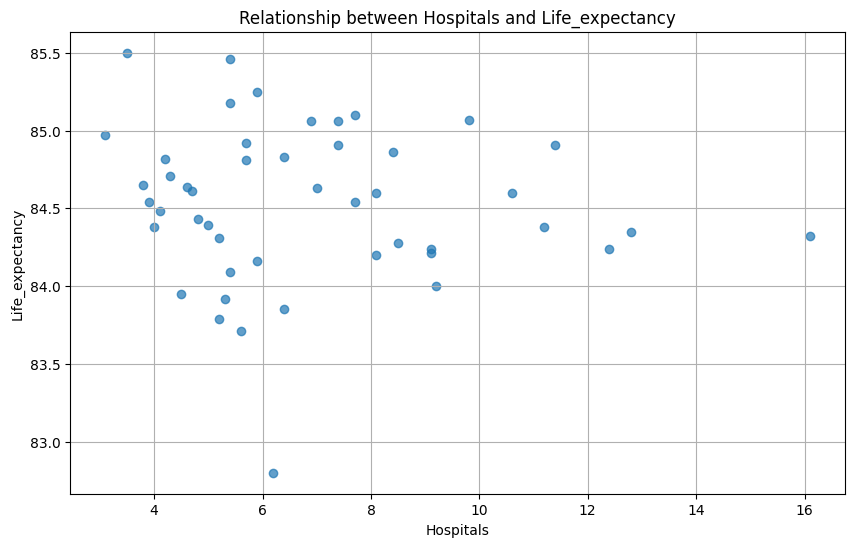

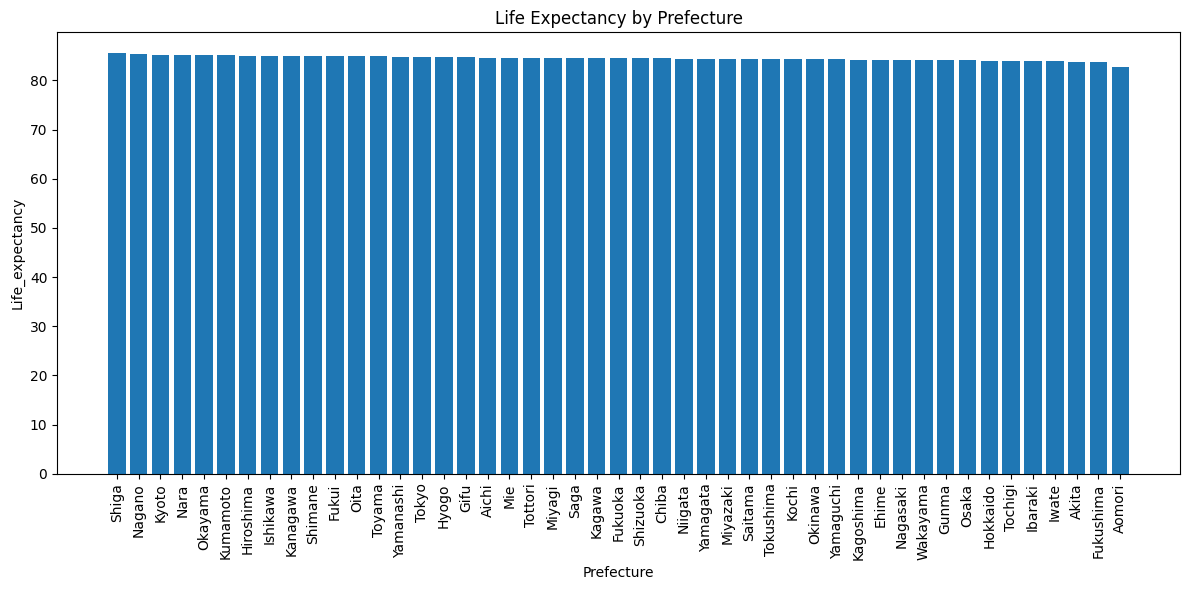

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# データを読み込む関数
def load_data():
    """
    Japan_life_expectancy.csv を読み込み、データフレームを返す。
    """
    return pd.read_csv('Japan_life_expectancy.csv')

# 平均寿命の平均値を計算する関数
def calculate_average_life_expectancy():
    """
    全都道府県の平均寿命の平均値を計算して返す。
    """
    df = load_data()
    return df['Life_expectancy'].mean()

# 平均寿命が最も高い都道府県を見つける関数
def find_highest_life_expectancy():
    df = load_data()
    max_life_exp = df['Life_expectancy'].max()
    prefecture = df.loc[df['Life_expectancy'] == max_life_exp, 'Prefecture'].iloc[0]
    return prefecture, max_life_exp

# 散布図を作成する関数
def visualize_relationship(factor):
    df = load_data()
    plt.figure(figsize=(10, 6))
    plt.scatter(df[factor], df['Life_expectancy'], alpha=0.7)
    plt.xlabel(factor)
    plt.ylabel('Life_expectancy')
    plt.title(f"Relationship between {factor} and Life_expectancy")
    plt.grid(True)
    plt.show()

# 都道府県ごとの棒グラフ
def bar_chart_life_expectancy_by_prefecture():
    df = load_data()
    df_sorted = df.sort_values('Life_expectancy', ascending=False)
    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted['Prefecture'], df_sorted['Life_expectancy'])
    plt.xlabel('Prefecture')
    plt.ylabel('Life_expectancy')
    plt.title('Life Expectancy by Prefecture')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# 実行例
visualize_relationship('Hospitals')
bar_chart_life_expectancy_by_prefecture()


In [64]:
print("テスト: 平均寿命の平均値計算")
avg = calculate_average_life_expectancy()
print("平均寿命の平均値:", avg)

テスト: 平均寿命の平均値計算
平均寿命の平均値: 84.52574468085108


In [65]:
print("テスト: 平均寿命が最も高い都道府県を見つける")
prefecture, max_life_exp = find_highest_life_expectancy()
print("平均寿命が最も高い都道府県:", prefecture)

テスト: 平均寿命が最も高い都道府県を見つける
平均寿命が最も高い都道府県: Shiga
